<a href="https://colab.research.google.com/github/ucheokechukwu/ml_tensorflow_deeplearning/blob/main/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow

In this video, we're going to learn how to write neural networks for classification problems.
Types of classifications: 
1. Binary classification.
2. Multiclass classification
3. Multilabel classification.

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles
# Make 1000 samples
n_samples = 1000
# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42) # random_state is like seed to make random reproducible

In [2]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

*Visualize... visualize... visualize...*

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:,0],
                        "X1": X[:,1],
                        "label":y})

In [5]:
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


## Input and output shapes

In [6]:
# Check the shapes of our features and labels:
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# Chek the length of our samples:
len(X), len(y)

(1000, 1000)

In [8]:
# View the first example of features and labels:
X[10],y[11]

(array([-0.64249042, -0.54409929]), 0)

In [9]:
# Check the labels
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

In [10]:
# Visualize with a plot
import matplotlib.pyplot as plt


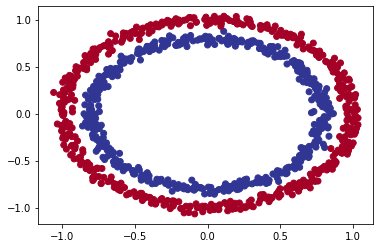

In [11]:
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

In [12]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [13]:
X.shape

(1000, 2)

## Steps in modelling

In [14]:
import tensorflow as tf

In [15]:
# set random seed
tf.random.set_seed(42)

# 1. Create a model:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu")
    # tf.keras.layers.input_shape([2]),
    # tf.keras.layers.Dense(100, activation=""),
    # td.keras.layers.Dense(3, name="output_layer", activation="sigmoid")
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics="accuracy")

# 3. Fit the modelling
model_1.fit(X,y, epochs=5)



# 4. Evaluate the model

# 5. Tweak the model

# 6. Evaluate, then tweak etc...

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 5.0220 - accuracy: 0.4740
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 4.9066 - accuracy: 0.4770
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 4.7449 - accuracy: 0.4800
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 4.5769 - accuracy: 0.4730
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 4.5458 - accuracy: 0.4720


Let's try and improve our model by training it for longer...

* Trying to see if accuracy improves by adding an extra layer. (0.49 accuracy is basically a coin flip)

In [16]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics="accuracy")

# 3 Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

# 4. Evaluate the model

model_2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.5000


[0.6939670443534851, 0.5]

In [17]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

from IPython.utils.io import unicode_std_stream
* Improving our model...

1. Create our model - add more layers or increase the number of hidden units
2. Compiling our model - using a different optimization funciton eg. Adam instead of SGD,
3. Fitting our model - let the model train for longer

In [18]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_3.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 2.4635 - accuracy: 0.4780
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7094 - accuracy: 0.5040
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6958 - accuracy: 0.4840
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6963 - accuracy: 0.4670
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6956 - accuracy: 0.4810
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6964 - accuracy: 0.4540
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6957 - accuracy: 0.5060
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6954 - accuracy: 0.5240
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6990 - accuracy: 0.4880
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6946 - accuracy: 0.4750
Epoch 11/

In [19]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6974 - accuracy: 0.5110


[0.6973753571510315, 0.5109999775886536]

* Observation: still getting 0.5 accuracy whichi is just as good as guessing.
Next strategy: lets try and visaulize 

In [20]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [21]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [22]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               300       
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


In [23]:
model_3.predict(X)

32/32 [==============================] - 0s 1ms/step


array([[0.48504406],
       [0.5617888 ],
       [0.5657646 ],
       [0.56516635],
       [0.45437032],
       [0.5690298 ],
       [0.5496525 ],
       [0.48062629],
       [0.4910885 ],
       [0.5644935 ],
       [0.5265892 ],
       [0.52049345],
       [0.5563405 ],
       [0.46248615],
       [0.45891094],
       [0.47329766],
       [0.5505849 ],
       [0.4764616 ],
       [0.55444896],
       [0.51814693],
       [0.5009393 ],
       [0.5808275 ],
       [0.47475886],
       [0.48777276],
       [0.58260745],
       [0.5733013 ],
       [0.54112554],
       [0.46512693],
       [0.46963274],
       [0.46100116],
       [0.49416918],
       [0.5687307 ],
       [0.5476559 ],
       [0.46259534],
       [0.4753831 ],
       [0.5858481 ],
       [0.5692947 ],
       [0.5214698 ],
       [0.4702232 ],
       [0.50267315],
       [0.5145666 ],
       [0.5353613 ],
       [0.5247369 ],
       [0.461057  ],
       [0.5351658 ],
       [0.5489152 ],
       [0.45924574],
       [0.535

* Notice how all the predictions are around 0.5 and not closer to 0 or 1?
* Further visualization plotting...

  * Take in a trained model, features (X) and labels (y)
  * Create a meshgrid of the different X alues
  * Make predictions across the meshgrid
  * Plot the predictions and a line between zones where each unique class fails

In [24]:
import numpy as np

In [25]:
def plot_decision_boundary(model, X, y):
  '''
  Plots the decision borundary created by a model 
  predicting on X
  '''

  # Define the axis boundaries of the plot and create a mesh grid
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max()+ 0.1 # adding and subtracting 0.1 for margins
  y_min, y_max = X[:,1].min() - 0.1, X[:,0].max()+ 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X value (we're going to predict with these)
  x_in =np.c_[xx.ravel(), yy.ravel()] # np.c_ used to stack 2D arrays

  # Make predictions
  y_pred = model.predict(x_in)

  # Check if we're working on a multi-class or a binary classification
  if len(y_pred[0])>1:
    print("Doing multiclass classification")
    # We have to reshape our predictions to get them ready
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
  plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 2ms/step
Doing binary classification


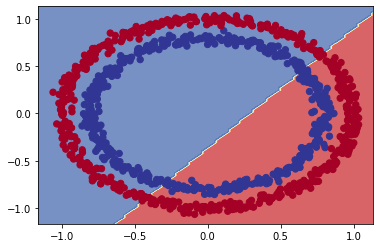

In [26]:
## Check out the predictions our model is making...
plot_decision_boundary(model_3, X, y)

* Observation: Our model is not working because it's trying to fit a straight line through circle data...

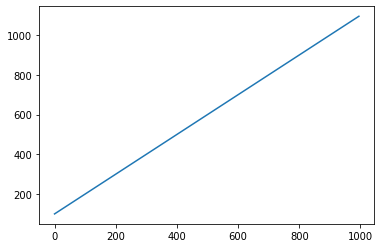

In [27]:
# Let's see if our model can be used for a regression problem...

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5) # y = x+100

plt.plot(X_regression, y_regression)

In [28]:
# Split regression data into training and test set
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data

model_3.fit(X_reg_train, y_reg_train)

ValueError: ignored

* Oh wait... we compiled our model for a Binary classification problem. But we're now working on a regression. Let's change the model to suit our data.

In [29]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_4.compile(loss=tf.keras.losses.mean_absolute_error,
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics="mae")

history = model_4.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 6ms/step - loss: 245.0269 - mae: 245.0269
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 111.3686 - mae: 111.3686
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 54.0195 - mae: 54.0195
Epoch 4/100
5/5 [==============================] - 0s 6ms/step - loss: 76.9829 - mae: 76.9829
Epoch 5/100
5/5 [==============================] - 0s 8ms/step - loss: 55.6377 - mae: 55.6377
Epoch 6/100
5/5 [==============================] - 0s 10ms/step - loss: 47.2076 - mae: 47.2076
Epoch 7/100
5/5 [==============================] - 0s 8ms/step - loss: 46.1736 - mae: 46.1736
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 44.4868 - mae: 44.4868
Epoch 9/100
5/5 [==============================] - 0s 6ms/step - loss: 42.7818 - mae: 42.7818
Epoch 10/100
5/5 [==============================] - 0s 6ms/step - loss: 43.3982 - mae: 43.3982
Epoch 11/100
5/5 [==============================] - 0s

2/2 [==============================] - 0s 4ms/step


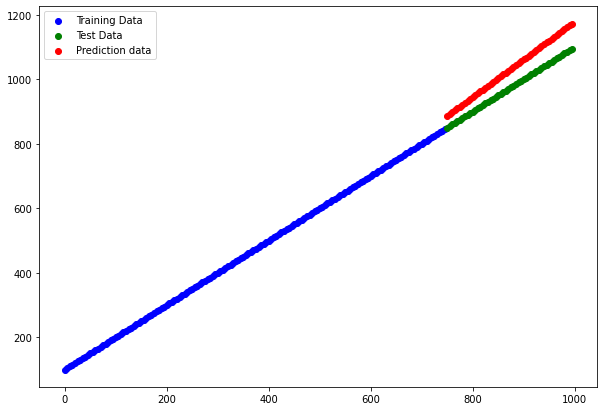

In [30]:
# Make predictions with our trained model
y_reg_preds = model_4.predict(X_reg_test)

# Plot the model's predictions against our groundtruth?

plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training Data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test Data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Prediction data")
plt.legend()

### The missing piece: non-linearity

In [31]:
tf.random.set_seed(42)
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="linear", input_shape=[2])
])

model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics="accuracy")
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [32]:
tf.random.set_seed(42)
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear, input_shape=[2])
])

model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics="accuracy")
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [33]:
history = model_6.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 7ms/step - loss: 5.6577 - accuracy: 0.4820
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 5.6154 - accuracy: 0.4820
Epoch 3/100
32/32 [==============================] - 0s 7ms/step - loss: 5.5896 - accuracy: 0.4820
Epoch 4/100
32/32 [==============================] - 0s 9ms/step - loss: 5.5839 - accuracy: 0.4820
Epoch 5/100
32/32 [==============================] - 0s 6ms/step - loss: 5.5805 - accuracy: 0.4820
Epoch 6/100
32/32 [==============================] - 0s 6ms/step - loss: 5.5422 - accuracy: 0.4820
Epoch 7/100
32/32 [==============================] - 0s 7ms/step - loss: 5.4357 - accuracy: 0.4790
Epoch 8/100
32/32 [==============================] - 0s 7ms/step - loss: 5.3442 - accuracy: 0.4810
Epoch 9/100
32/32 [==============================] - 0s 8ms/step - loss: 5.3201 - accuracy: 0.4810
Epoch 10/100
32/32 [==============================] - 0s 7ms/step - loss: 5.3007 - accuracy: 0.4780
Epoch 11/

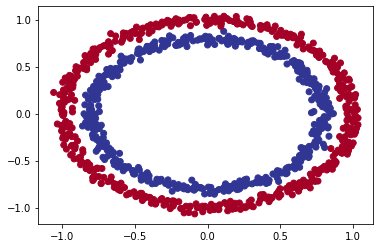

In [34]:
# Check out our data
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:711: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:711: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)


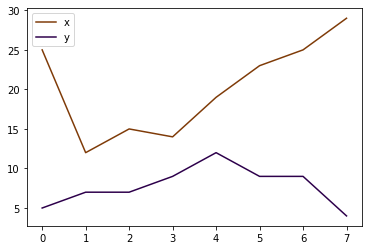

In [35]:
import pandas as pd

#create DataFrame
df = pd.DataFrame({'x': [25, 12, 15, 14, 19, 23, 25, 29],
                   'y': [5, 7, 7, 9, 12, 9, 9, 4],
                   'z': ['A', 'A', 'B', 'B', 'B', 'C', 'C', 'C']})

df.plot(c=df.z, cmap=plt.cm.PuOr);

313/313 [==============================] - 0s 1ms/step
Doing binary classification


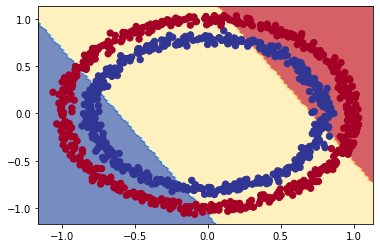

In [36]:
# Check the decision boundary of model_5
plot_decision_boundary(model = model_6, X=X, y=y)

In [37]:
# Let's try to build our first neural network with non-linear activation function.
# Trying activation - relu

In [38]:
tf.random.set_seed(42)
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = "relu")
])
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics="mae")
history=model_7.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.7046 - mae: 0.5386
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6363 - mae: 0.5379
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6100 - mae: 0.5373
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5866 - mae: 0.5370
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5838 - mae: 0.5369
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5434 - mae: 0.5369
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5150 - mae: 0.5365
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.4664 - mae: 0.5361
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.4045 - mae: 0.5357
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.3651 - mae: 0.5355
Epoch 11/100
32/32 [==============================] - 0s 2m

313/313 [==============================] - 0s 1ms/step
Doing binary classification


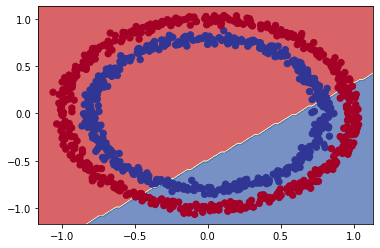

In [39]:
# Check the decision boundary of model_7
plot_decision_boundary(model = model_7, X=X, y=y)

In [40]:
# Replicating multi-layer neural network

tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu")
])

model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics="accuracy")

history = model_8.fit(X,y,epochs=300)

Epoch 1/300
32/32 [==============================] - 1s 3ms/step - loss: 5.3853 - accuracy: 0.4990
Epoch 2/300
32/32 [==============================] - 0s 2ms/step - loss: 4.6846 - accuracy: 0.5050
Epoch 3/300
32/32 [==============================] - 0s 3ms/step - loss: 3.8287 - accuracy: 0.5060
Epoch 4/300
32/32 [==============================] - 0s 3ms/step - loss: 3.2896 - accuracy: 0.5120
Epoch 5/300
32/32 [==============================] - 0s 3ms/step - loss: 3.1195 - accuracy: 0.5230
Epoch 6/300
32/32 [==============================] - 0s 3ms/step - loss: 3.0643 - accuracy: 0.5300
Epoch 7/300
32/32 [==============================] - 0s 3ms/step - loss: 3.0340 - accuracy: 0.5290
Epoch 8/300
32/32 [==============================] - 0s 2ms/step - loss: 3.0048 - accuracy: 0.5250
Epoch 9/300
32/32 [==============================] - 0s 3ms/step - loss: 2.9607 - accuracy: 0.5230
Epoch 10/300
32/32 [==============================] - 0s 2ms/step - loss: 2.9276 - accuracy: 0.5220
Epoch 11/

313/313 [==============================] - 1s 2ms/step
Doing multiclass classification


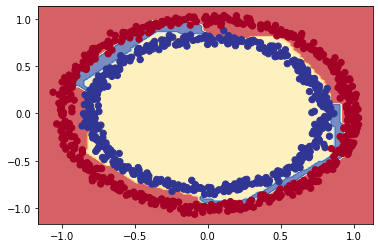

In [41]:
# Check the decision boundary of model_8
plot_decision_boundary(model = model_8, X=X, y=y)

* Note: we have not put an activation on the output layer

In [42]:
tf.random.set_seed(42)

model_9= tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid") # this is the output layer. 1 output for a binary classification

])

model_9.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")



In [43]:
model_9.fit(X,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6919 - accuracy: 0.5040
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.5060
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.5070
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6893 - accuracy: 0.5090
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.5040
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.5030
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6879 - accuracy: 0.5130
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6877 - accuracy: 0.5150
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.5140
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6871 - accuracy: 0.5140
Epoch 11/

313/313 [==============================] - 1s 1ms/step
Doing binary classification


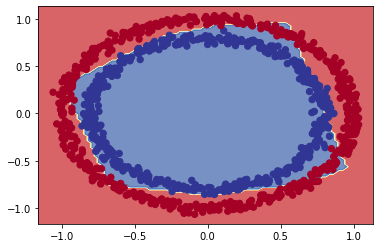

In [44]:
# Check the decision boundary of model_9
plot_decision_boundary(model = model_9, X=X, y=y)

**Note**: The combination of linear and non-linear functions is how neural networks works.
 

In [45]:
# We will create a toy tensor A to explore the activation function sigmoid
A = tf.cast(tf.range(-10,10), tf.float32)

In [46]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

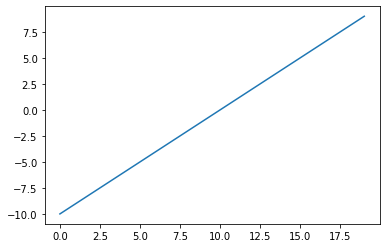

In [47]:
plt.plot(A)

### Exploring the non-linear activation function.  

#### `sigmoid` 
Let's start by replicating sigmoid where sigmoid(x) = 1/(1+exp(-x))

In [48]:
def sigmoid(x):
  return 1/(1+tf.exp(-x))

In [49]:
# Use the sigmoid on our toy tensor and plot it:
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

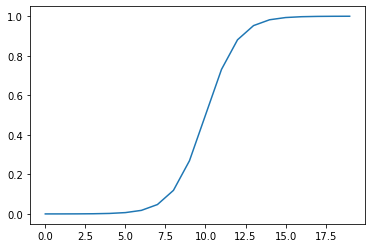

In [50]:
plt.plot(sigmoid(A))

#### `relu` activation function

In [51]:
def relu(x):
  return tf.maximum(0,x)

In [52]:
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

In [53]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

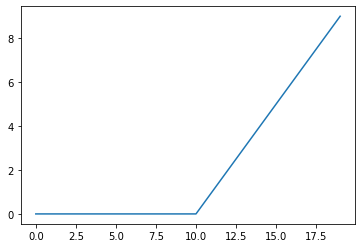

In [54]:
plt.plot(relu(A))

#### `linear` activation function:
It returns the input *unmodified*! 😮

In [55]:
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

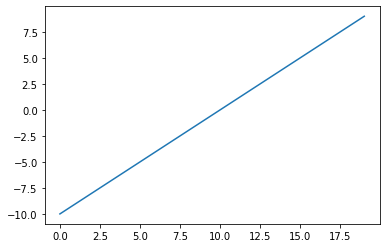

In [56]:
# does it really not change anything?
plt.plot(tf.keras.activations.linear(A))

In [57]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

* This completely explains why the model couldn't learn any patterns in the non-linear data because the activation function was linear. 

## Evaluating and Improving our Classification Models

So far we've been training and testing on the same dataset which is WRONG!

In [58]:
# Check how many samples we have:
len(X), len(y)

(1000, 1000)

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [61]:
X_train.shape, X_test.shape

((800, 2), (200, 2))

In [62]:
y_train.shape, y_test.shape

((800,), (200,))

In [63]:
# Let's recreate the model to fit on the training data and evaluate on the test data

tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model_10.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                 metrics="accuracy")



In [64]:
history = model_10.fit(X_train, y_train, epochs=25) 

Epoch 1/25
25/25 [==============================] - 1s 3ms/step - loss: 0.6976 - accuracy: 0.4975
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.4988
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6842 - accuracy: 0.5175
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.5337
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6616 - accuracy: 0.5863
Epoch 6/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6361 - accuracy: 0.7063
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6056 - accuracy: 0.7550
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5700 - accuracy: 0.7925
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5304 - accuracy: 0.8188
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.4853 - accuracy: 0.8712
Epoch 11/25
25/25 [

In [65]:
# Evaluate the model on the test data set
model_10.evaluate(X_test,y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.1225 - accuracy: 0.9800


[0.12251613289117813, 0.9800000190734863]

313/313 [==============================] - 1s 2ms/step
Doing binary classification
313/313 [==============================] - 0s 1ms/step
Doing binary classification


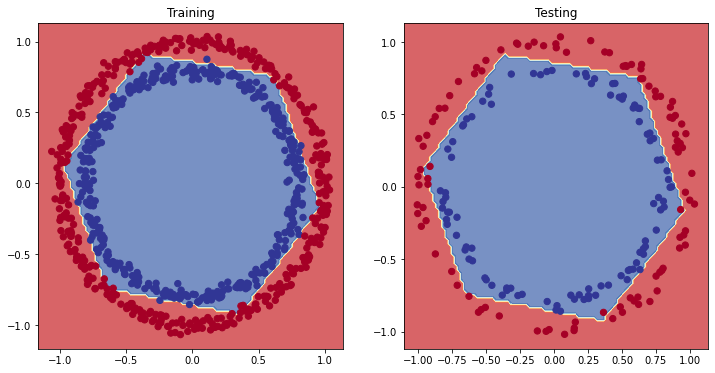

In [66]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Training")
plot_decision_boundary(model = model_10, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Testing")
plot_decision_boundary(model = model_10, X=X_test, y=y_test)

### Plot the loss curves
* Why? *visualize visualize VISUALIZE!*

In [67]:
history.history

{'loss': [0.6976473927497864,
  0.6911120414733887,
  0.6842195987701416,
  0.6743810176849365,
  0.6615553498268127,
  0.636108934879303,
  0.6055736541748047,
  0.5700222849845886,
  0.5303523540496826,
  0.4852829873561859,
  0.44109413027763367,
  0.3938605785369873,
  0.3439832329750061,
  0.308012992143631,
  0.2833063006401062,
  0.2599252760410309,
  0.22882547974586487,
  0.21337145566940308,
  0.19246900081634521,
  0.17826025187969208,
  0.16331668198108673,
  0.1613718569278717,
  0.14717084169387817,
  0.13800281286239624,
  0.13527432084083557],
 'accuracy': [0.4975000023841858,
  0.4987500011920929,
  0.5174999833106995,
  0.5337499976158142,
  0.5862500071525574,
  0.706250011920929,
  0.7549999952316284,
  0.7925000190734863,
  0.8187500238418579,
  0.8712499737739563,
  0.8787500262260437,
  0.925000011920929,
  0.9449999928474426,
  0.9549999833106995,
  0.9462500214576721,
  0.9587500095367432,
  0.9637500047683716,
  0.9637500047683716,
  0.9725000262260437,
  0.97

In [68]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.697647,0.49750
1,0.691112,0.49875
2,0.684220,0.51750
3,0.674381,0.53375
4,0.661555,0.58625
5,0.636109,0.70625
6,0.605574,0.75500
7,0.570022,0.79250
8,0.530352,0.81875
9,0.485283,0.87125


Text(0.5, 1.0, 'Model 10 Loss Curves')

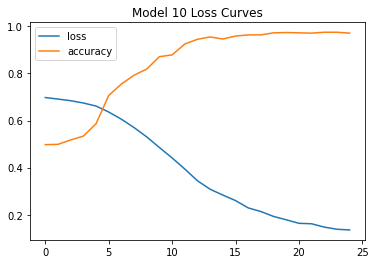

In [75]:
history_10=history
pd.DataFrame(history.history).plot()
plt.title ("Model 10 Loss Curves")

* Note that for many problems, the loss function going down means the model is improving and predictions are approaching groundtruth labels.

## Find the best learning rate

To find the ideal learning rate i.e. the loss decreases the most during training, we will use the following steps:

1. Callback - an extra piece of functionality that we can add to the model while it's training. 
2. Another model 
3. A modified loss curve plot (from `history.history`)

In [70]:
# Creating a new model

tf.random.set_seed(42)
model_11 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_11.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics="accuracy")

# Callback has to exist before training...

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))
# Every epoch the learning rate is updated with this formula.


In [71]:
history_11 = model_11.fit(X_train, y_train, epochs=100,
                          callbacks=[lr_scheduler]) #callbacks are lists

Epoch 1/100
25/25 [==============================] - 2s 4ms/step - loss: 0.7808 - accuracy: 0.4950 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 6ms/step - loss: 0.7782 - accuracy: 0.4925 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7753 - accuracy: 0.4900 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7721 - accuracy: 0.4888 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7690 - accuracy: 0.4888 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7653 - accuracy: 0.4850 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7617 - accuracy: 0.4750 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7577 - accuracy: 0.4725 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

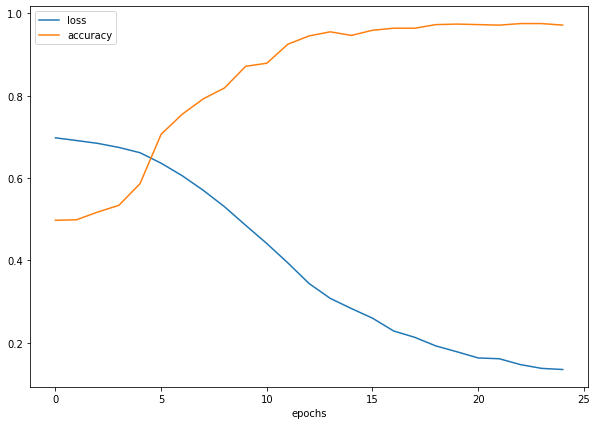

In [74]:
pd.DataFrame(history_10.history).plot(figsize=(10,7), 
                                   xlabel="epochs") #remember to change it to a pandas dataframe first!

Text(0.5, 1.0, 'Model 11 Loss Curves')

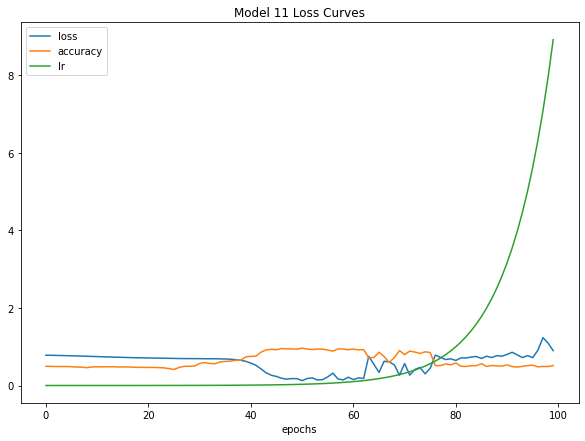

In [77]:
pd.DataFrame(history_11.history).plot(figsize=(10,7), 
                                   xlabel="epochs")
plt.title ("Model 11 Loss Curves")

In [79]:
# Plot the learning rate vs loss
lrs = 1e-4*(10**(tf.range(100)/20))
len(lrs)

100

Text(0.5, 1.0, 'Learning rate vs Loss')

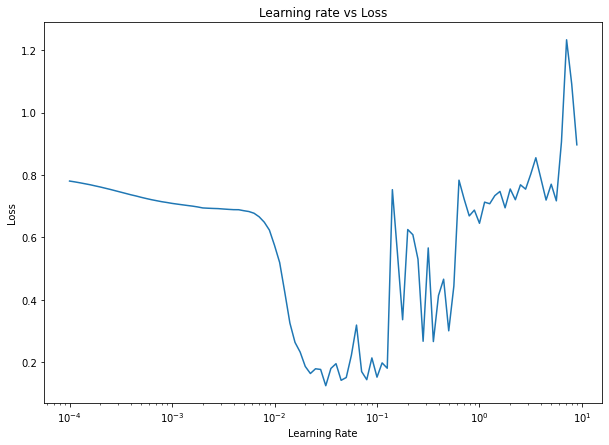

In [81]:
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_11.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

** Observation: The ideal learning rate is the point just before the lowest learning rate when the loss function gradient is still a sharp decline. So in this graph, it's somewhere between 10^-2 and 10^-1

In [83]:
# Exampe of other typical learning rates values=
10**0, 10**-1, 10**-2, 10**3, 1e-4

(1, 0.1, 0.01, 1000, 0.0001)

In [84]:
[a,b,c,d,e]=10**0, 10**-1, 10**-2, 10**3, 1e-4

In [92]:
# Creating a new model with a more ideal learning rate
model_12 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model_12.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics="accuracy")



In [93]:
history_12 = model_12.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6852 - accuracy: 0.5650
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6668 - accuracy: 0.5900
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6453 - accuracy: 0.6475
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5978 - accuracy: 0.7188
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5421 - accuracy: 0.7613
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4756 - accuracy: 0.8100
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4286 - accuracy: 0.8462
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3681 - accuracy: 0.8850
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2631 - accuracy: 0.9388
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.1907 - accuracy: 0.9737
Epoch 11/20
25/25 [

In [94]:
# Evaluate models 12 and 10 on the test data

In [95]:
model_12.evaluate(X_test, y_test)

7/7 [==============================] - 0s 7ms/step - loss: 0.0546 - accuracy: 0.9900


[0.0545649528503418, 0.9900000095367432]

In [97]:
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 6ms/step - loss: 0.1225 - accuracy: 0.9800


[0.12251613289117813, 0.9800000190734863]

* `model_12` did better than `model_10` with less epochs

313/313 [==============================] - 3s 7ms/step
Doing binary classification
313/313 [==============================] - 1s 2ms/step
Doing binary classification


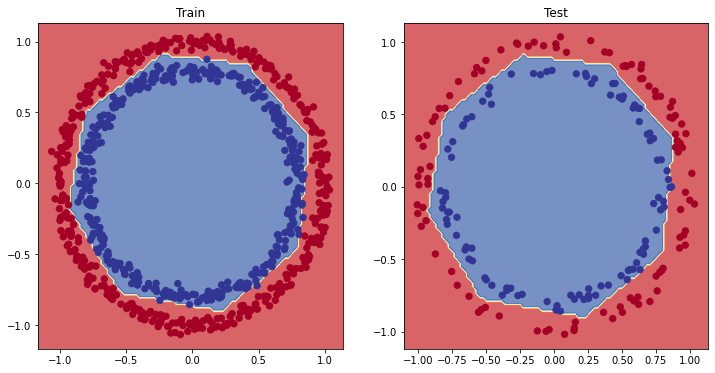

In [99]:
# Plot decision boundaries for training and test set
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_12, X=X_train, y=y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_12,X=X_test,y=y_test)

In [ ]:
""